Let's explore how different aspects of SpaceX missions have changed over time.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../input/database.csv')
data.sample(10)

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
23,F9-16,2 March 2015,03:50,Cape Canaveral AFS LC-40,Falcon 9 (v1.1),ABS-3A,Communication Satellite,4159.0,Geostationary Transfer Orbit,Asia Broadcast Satellite,Business,Bermuda,Success,NaN,None,NaN
29,F9-21,17 January 2016,18:42,Vandenberg AFB SLC-4E,Falcon 9 (v1.1),Jason-3,Weather Satellite,553.0,Low Earth Orbit,NASA; NOAA; CNES,Government,United States,Success,NaN,Ship,Failure
11,F9-4,8 October 2012,00:35,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),Orbcomm-OG2,Communication Satellite,150.0,Low Earth Orbit,Orbcomm,Business,United States,Failure,Engine Failure During Flight,NaN,NaN
27,F9-19,28 June 2015,14:21,Cape Canaveral AFS LC-40,Falcon 9 (v1.1),SpaceX CRS-7,Space Station Supplies,1952.0,Low Earth Orbit,NASA,Government,United States,Failure,Vehicle Explosion During Flight,NaN,NaN
25,F9-17,14 April 2015,20:10,Cape Canaveral AFS LC-40,Falcon 9 (v1.1),SpaceX CRS-6,Space Station Supplies,1898.0,Low Earth Orbit,NASA,Government,United States,Success,NaN,Ship,Failure
12,F9-5,1 March 2013,15:10,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS-2,Space Station Supplies,677.0,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN
9,F9-3,22 May 2012,07:44,Cape Canaveral AFS LC-40,Falcon 9 (v1.0),SpaceX CRS (Dragon C2+),Space Station Supplies,NaN,Low Earth Orbit,NASA,Government,United States,Success,NaN,NaN,NaN
33,FT-5,27 May 2016,21:39,Cape Canaveral AFS LC-40,Falcon 9 Full Thrust (v1.2),Thaicom 8,Communication Satellite,3100.0,Geostationary Transfer Orbit,Thaicom,Business,Thailand,Success,NaN,Ship,Success
35,FT-6,15 June 2016,14:29,Cape Canaveral AFS LC-40,Falcon 9 Full Thrust (v1.2),Eutelsat 117 West B (Satmex 9),Communication Satellite,3600.0,Geostationary Transfer Orbit,Eutelsat (Satmex),Business,France (Mexico),Success,NaN,Ship,Failure


Let's convert "Launch Date" to timestamp for plotting (ignoring "Launch Time").

In [2]:
import calendar
import time
import datetime

month = {v: k for k,v in enumerate(calendar.month_name)}

def dateToTimestamp(d):
    t = d.split()
    d = '{0}/{1}/{2}'.format(month[t[1]], t[0], t[2])
    return time.mktime(datetime.datetime.strptime(d, "%m/%d/%Y").timetuple())

data['timestamp'] = data['Launch Date'].apply(dateToTimestamp)

Let's write some functions to setup plotting.

In [3]:
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_context("notebook")
sns.set_style("whitegrid")

def myFormatter(x, pos):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

def plotOverTime(col):
    ax = sns.swarmplot(x="timestamp", y=col, data=data)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(myFormatter))
    ax.set(xlabel='Date')

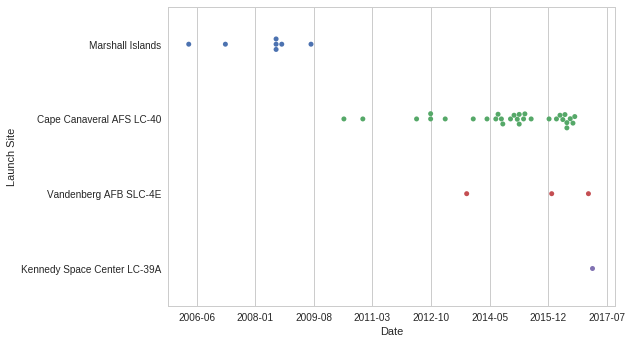

In [4]:
plotOverTime('Launch Site')

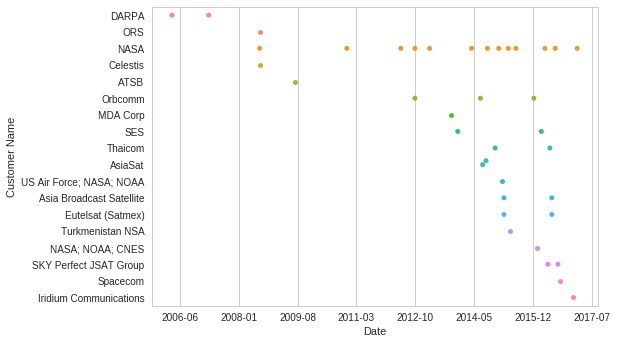

In [5]:
plotOverTime('Customer Name')

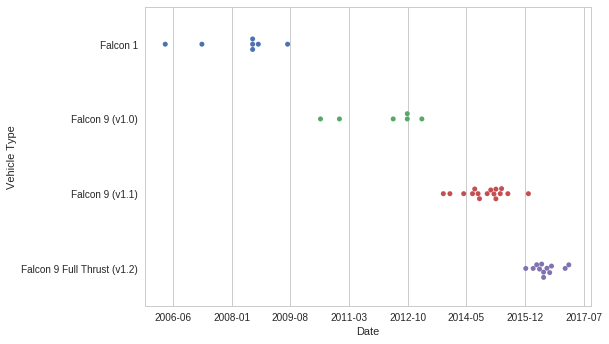

In [6]:
plotOverTime('Vehicle Type')

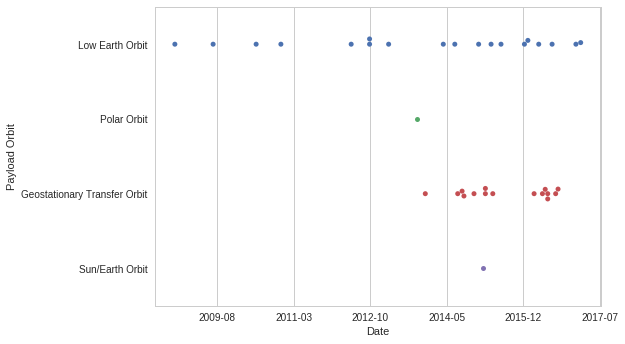

In [7]:
plotOverTime('Payload Orbit')

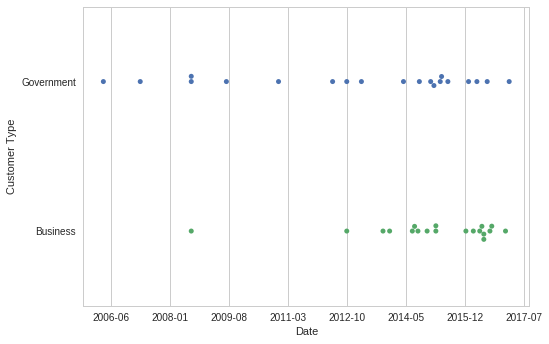

In [8]:
plotOverTime('Customer Type')

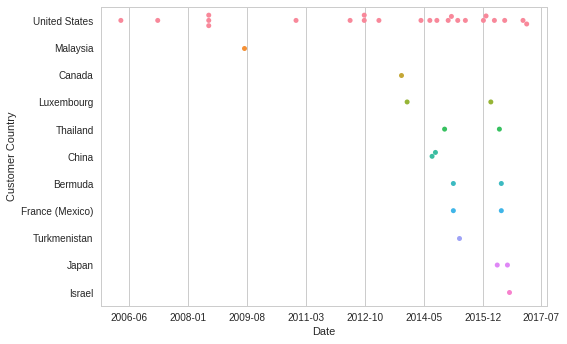

In [9]:
plotOverTime('Customer Country')

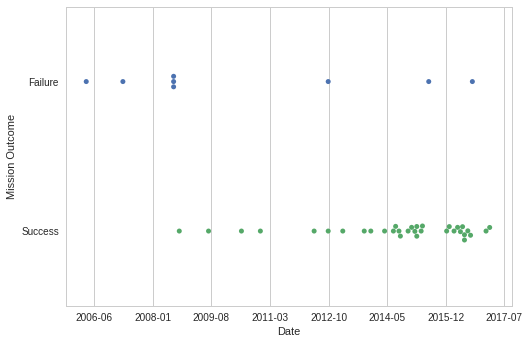

In [10]:
plotOverTime('Mission Outcome')

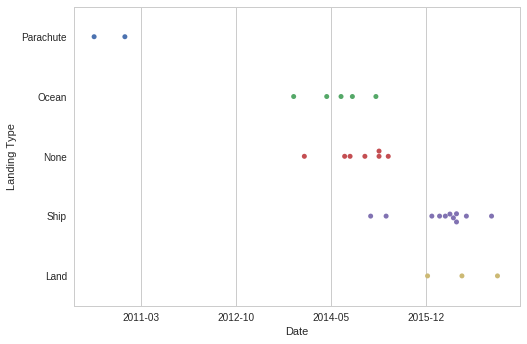

In [11]:
plotOverTime('Landing Type')